<a href="https://colab.research.google.com/github/AadilRashid/LibraryManagement/blob/master/Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/DeepLearning/course2

/content/drive/MyDrive/DeepLearning/course2


## Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## loading Datasets

In [ ]:
# #from keras
# from tensorflow.keras.datasets import  imdb
# (x_train,y_train),(x_test,y_test) = imdb.load_data()

In [ ]:
# print(x_train.shape,x_test.shape)
# y_train[0]

In [ ]:
#from sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data[:,:3],cancer.target,random_state= 0 )

In [ ]:
#print(x_train[:,0].shape,y_train.shape)
rad,tex,per = x_train.transpose()

In [ ]:
#rad.shape
y_train.shape

(426,)

## Defining a Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,concatenate
from tensorflow.keras import Input

mean_rad = Input(shape =(1,),name="rad")
mean_tex = Input(shape = (1,),name = "tex")
mean_per = Input(shape =(1,),name = "par")
input_list = [mean_rad,mean_tex,mean_per]
inputs = concatenate(input_list)

output1 = Dense(124,activation ="relu")(inputs)
output1 = Dense(2,activation = "softmax")(output1)

output2=  Dense(64,activation = "relu")(inputs)
output2=  Dense(2,activation = "softmax")(output2)



model = Model(inputs =input_list,outputs = [output1,output2] )


#inputs = Input(input = x_train[1:])

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["acc"])

In [ ]:
history = model.fit((rad,tex,per),(y_train,y_train),epochs = 50)


Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 19.1876 - dense_1_loss: 9.6956 - dense_3_loss: 9.4919 - dense_1_acc: 0.3732 - dense_3_acc: 0.6268
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 3.7617 - dense_1_loss: 1.8277 - dense_3_loss: 1.9340 - dense_1_acc: 0.5869 - dense_3_acc: 0.4906
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 2.0144 - dense_1_loss: 0.9552 - dense_3_loss: 1.0592 - dense_1_acc: 0.4390 - dense_3_acc: 0.5305
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 1.4600 - dense_1_loss: 0.7399 - dense_3_loss: 0.7201 - dense_1_acc: 0.5657 - dense_3_acc: 0.5516
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 1.3071 - dense_1_loss: 0.6641 - dense_3_loss: 0.6429 - dense_1_acc: 0.6221 - dense_3_acc: 0.6455
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 1.2692 - dense_1_loss: 0.6362 - dense_3_loss: 0.6329 - dense_1_acc: 0.6408 - dense

In [ ]:
rad_test,tex_test,per_test = x_test.transpose()

In [ ]:
l = model.evaluate((rad_test,tex_test,per_test),(y_test,y_test))

5/5 [==============================] - 0s 3ms/step - loss: 1.0456 - dense_1_loss: 0.4758 - dense_3_loss: 0.5698 - dense_1_acc: 0.7972 - dense_3_acc: 0.6643


In [ ]:
l

[1.045581579208374,
 0.4758237898349762,
 0.5697576999664307,
 0.7972028255462646,
 0.6643356680870056]

In [ ]:

his = pd.DataFrame(history.history)

his

,loss,dense_1_loss,dense_3_loss,dense_1_acc,dense_3_acc
0,19.187580,9.695649,9.491928,0.373239,0.626761
1,3.761690,1.827735,1.933955,0.586854,0.490610
2,2.014376,0.955191,1.059185,0.438967,0.530516
3,1.460025,0.739928,0.720097,0.565728,0.551643
4,1.307065,0.664119,0.642945,0.622066,0.645540
5,1.269194,0.636249,0.632945,0.640845,0.610329
6,1.222684,0.607227,0.615456,0.676056,0.659624
7,1.200659,0.592441,0.608218,0.694836,0.669014
8,1.179958,0.577213,0.602745,0.708920,0.661972
9,1.183283,0.579618,0.603665,0.704225,0.661972


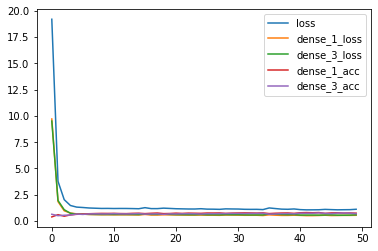

In [ ]:
#plt.plot(range(len(hist)), hist
his.plot().legend(loc = "upper right")
plt.show()


## Creating tensorflow Variables

In [ ]:
var = tf.Variable([[5],[4],[4],[5],[3]])
var



<tf.Variable 'Variable:0' shape=(5, 1) dtype=int32, numpy=
array([[5],
       [4],
       [4],
       [5],
       [3]], dtype=int32)>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

test_model = Sequential([Dense(1,activation = "softmax",input_shape = (4,))])

In [ ]:
test_model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["acc"])

In [ ]:
test_model(tf.Variable([[1,2,3,4]]),tf.Variable(1))


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input
input  = Input(shape = (5,))
output  = Dense(1,activation ="sigmoid")(input)

model = Model(inputs = input,outputs =output)
print(input,output,model.weights,model)

KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'") [<tf.Variable 'dense_5/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[ 0.9015906 ],
       [-0.9398279 ],
       [-0.14922142],
       [-0.59772086],
       [-0.24948215]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>] <tensorflow.python.keras.engine.functional.Functional object at 0x7f452c2ab990>


In [ ]:
var = var.assign([[4],[4],[4],[4],[4]])
var

<tf.Variable 'UnreadVariable' shape=(5, 1) dtype=int32, numpy=
array([[4],
       [4],
       [4],
       [4],
       [4]], dtype=int32)>

In [ ]:
var.numpy()

array([[4],
       [4],
       [4],
       [4],
       [4]], dtype=int32)

## Creating Tensorflow Tensors

In [ ]:
tensor1 = tf.constant([4])

In [ ]:
tensor1

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([4], dtype=int32)>

In [ ]:
tensor1.assign([4])

AttributeError: ignored

In [ ]:
tensor1.numpy()

array([4], dtype=int32)

In [ ]:
string1 = tf.Variable("Hello World")

In [ ]:
string2  = tf.Variable(["Hello World"])

In [ ]:
string1==string2

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [ ]:
string1.shape, string2.shape

(TensorShape([]), TensorShape([1]))

In [ ]:
a= tf.Variable(tf.constant(3.4,shape=(4,5)))

In [ ]:
a[0,1].assign(1)

<tf.Variable 'UnreadVariable' shape=(4, 5) dtype=float32, numpy=
array([[3.4, 1. , 3.4, 3.4, 3.4],
       [3.4, 3.4, 3.4, 3.4, 3.4],
       [3.4, 3.4, 3.4, 3.4, 3.4],
       [3.4, 3.4, 3.4, 3.4, 3.4]], dtype=float32)>

## Three important Tensor functions

In [ ]:
a = a[:3,:3]
b=a[:,0]

a,b

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[3.4, 1. , 3.4],
        [3.4, 3.4, 3.4],
        [3.4, 3.4, 3.4]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([3.4, 3.4, 3.4], dtype=float32)>)

In [ ]:
c = tf.concat([b,a],0)

InvalidArgumentError: ignored

In [ ]:
tf.expand_dims(b,0)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[3.4, 3.4, 3.4]], dtype=float32)>

In [ ]:
v = tf.Variable([12,3,3,4])
v

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([12,  3,  3,  4], dtype=int32)>

In [ ]:
v=tf.expand_dims(v,0)
v

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[12,  3,  3,  4]], dtype=int32)>

In [ ]:
tf.squeeze(v,0)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([12,  3,  3,  4], dtype=int32)>

## Accessing model parameters

In [ ]:
from tensorflow.keras.layers import Conv1D, AveragePooling1D
inputs = Input(shape=(32,1))
h =Conv1D(3,5,activation="relu",name = "convlution1")(inputs)
h1 =AveragePooling1D(3,name = "average_polling")(h)
h2 =Flatten(name='flatten')(h1)
output =Dense(1,activation = "sigmoid",name = "dense")(h2)

model = Model(inputs=inputs,outputs = output)

In [ ]:
print(model.layers[3].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 27), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 1)]           0         
_________________________________________________________________
convlution1 (Conv1D)         (None, 28, 3)             18        
_________________________________________________________________
average_polling (AveragePool (None, 9, 3)              0         
_________________________________________________________________
flatten (Flatten)            (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 28        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##Accessing individual layers

model.input,model.output

(<KerasTensor: shape=(None, 32, 1) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>)